<a href="https://colab.research.google.com/github/bharathbiju/recommendation/blob/master/RecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
from google.colab import files
uploaded = files.upload()

Saving details.csv to details (2).csv


In [86]:
from google.colab import files
uploaded = files.upload()

Saving main file.csv to main file (2).csv


In [87]:

# import pandas library 
import pandas as pd 
  
# Get the data 
# column_names = ['user_id', 'item_id', 'rating', 'timestamp'] 
  
# path = 'https://media.geeksforgeeks.org/wp-content/uploads/file.tsv'
  
# df = pd.read_csv(path, sep='\t', names=column_names)

df =  pd.read_csv("main file.csv")
  
# Check the head of the data 
df.head() 


,userid,Item_id,rating,timestamp
0,1,1,1,881250949
1,1,16,1,881250910
2,1,120,2,881251949
3,1,14,1,881250849
4,1,96,5,881255949


In [88]:
movie_titles = pd.read_csv('details.csv') 
movie_titles.head() 

,Item_id,Course
0,1,BA English
1,2,BA in Political Science
2,3,BA History
3,4,BA Psychology
4,5,BA Philosophy


In [89]:

data = pd.merge(df, movie_titles, on='Item_id') 
data.head() 


,userid,Item_id,rating,timestamp,Course
0,1,1,1,881250949,BA English
1,2,1,1,881250992,BA English
2,3,1,1,881250754,BA English
3,4,1,1,881250969,BA English
4,6,1,2,881250977,BA English


In [90]:
data.groupby('Course')['rating'].mean().sort_values(ascending=False).head()

Course
BA Education               5.0
B.Sc. Nursing              5.0
B.Sc. Maths                5.0
B.Sc. BioTechnology        5.0
Electronics Engineering    5.0
Name: rating, dtype: float64

In [91]:
ratings = pd.DataFrame(data.groupby('Course')['rating'].mean())  
  
ratings['num of ratings'] = pd.DataFrame(data.groupby('Course')['rating'].count()) 
  
ratings.head() 

,rating,num of ratings
Course,,
BA Agro Sciences,3.0,1
BA Hebrew,1.0,1
BA Hindi,1.5,2
BA Italian,1.0,1
BA Linguistics,1.0,1


In [0]:

import matplotlib.pyplot as plt 
import seaborn as sns 
  
sns.set_style('dark') 
%matplotlib inline 


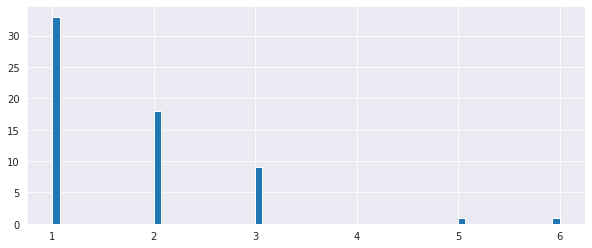

In [93]:

# plot graph of 'num of ratings column' 
plt.figure(figsize =(10, 4)) 
  
ratings['num of ratings'].hist(bins = 70) 


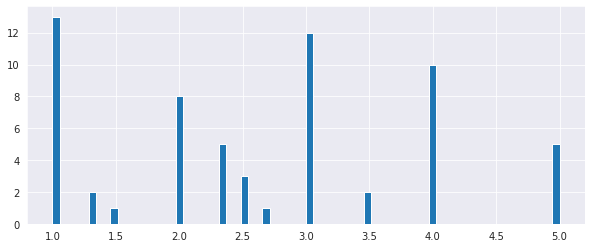

In [94]:

# plot graph of 'ratings' column 
plt.figure(figsize =(10, 4)) 
  
ratings['rating'].hist(bins = 70) 


In [104]:

# Sorting values according to  
# the 'num of rating column' 
moviemat = data.pivot_table(index ='userid', 
              columns ='Course', values ='rating') 
  
moviemat.head() 
  
ratings.sort_values('num of ratings', ascending = False).head(50) 


,rating,num of ratings
Course,,
BA English,1.333333,6
BA Economics,2.000000,5
Water resources engineering,1.333333,3
LLB,2.333333,3
B.Sc. Home Science,2.333333,3
BA Tamil,3.000000,3
Corrosion engineering,2.000000,3
B. Comm,2.333333,3
Civil Engineering,2.666667,3


In [105]:

# analysing correlation with similar movies 
Civil_Engineering_ratings = moviemat['B.Sc. Zoology'] 

  
Civil_Engineering_ratings.head() 


userid
1    NaN
2    NaN
3    NaN
4    5.0
5    NaN
Name: B.Sc. Zoology, dtype: float64

In [106]:

# analysing correlation with similar movies 
similar_to_starwars = moviemat.corrwith(Civil_Engineering_ratings) 
# similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings) 
  
corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation']) 
corr_starwars.dropna(inplace = True) 
  
corr_starwars.head() 


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
Course,
B.Sc. Biochemistry,-1.0
B.Sc. Botany,1.0
B.Sc. Zoology,1.0


In [107]:

# Similar movies like starwars corr_starwars.sort_values('Correlation', ascending = False).head(10) 
corr_starwars = corr_starwars.join(ratings['num of ratings']) 
  
corr_starwars.head() 
  
corr_starwars[corr_starwars['num of ratings']>10].sort_values('Correlation', ascending = False).head() 

,Correlation,num of ratings
Course,,
